Read the vertices and faces of triangles of 3D object


In [ ]:
import numpy as np

In [ ]:
#Reference: https://stackoverflow.com/questions/59535205/plotly-mesh3d-plot-from-a-wavefront-obj-file
def obj_data_to_mesh3d(odata):
    # odata is the string read from an obj file
    vertices = []
    faces = []
    lines = odata.splitlines()

    for line in lines:
        slist = line.split()
        if slist:
            if slist[0] == 'v':
                vertex = np.array(slist[1:], dtype=float)
                vertices.append(vertex)
            elif slist[0] == 'f':
                face = []
                for k in range(1, len(slist)):
                    face.append([int(s) for s in slist[k].replace('//','/').split('/')])
                if len(face) > 3: # triangulate the n-polyonal face, n>3
                    faces.extend([[face[0][0]-1, face[k][0]-1, face[k+1][0]-1] for k in range(1, len(face)-1)])
                else:
                    faces.append([face[j][0]-1 for j in range(len(face))])
            else: pass


    return np.array(vertices), np.array(faces)

In [ ]:
with open('Car.obj') as data:
  odata = data.read()
  (vertices, faces) = obj_data_to_mesh3d(odata)

In [ ]:
vertices[:,0]

array([-0.942557, -0.742557, -0.942557, ...,  0.007443,  0.313447,
        0.007443])

In [ ]:
faces

array([[1296, 1323, 1307],
       [1296, 1307, 1287],
       [1296, 1287, 1522],
       ...,
       [1248, 1253, 1252],
       [1248, 1252, 1251],
       [1248, 1251, 1250]])

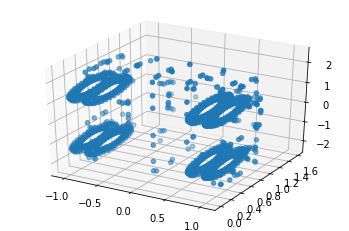

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])
plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2],
                                   mode='markers')])
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Mesh3d(
  x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=faces[:,0], j=faces[:,1], k=faces[:,2], color='green', opacity=0.20)])
  
fig.show()